In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_theme(style="ticks", palette="deep")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Directives pour les TPs

### Contenu textuel
### Code
### Figures
### Tableaux

# Contenu textuel du notebook

## Interprétez et comprenez vos résultats
Il ne sera pas suffisant de placer une figure ou un tableau sans explication. Il faut interpréter les résultats en appuyant sur les observations numériques. Par exemple:

**Bon:**<br>
<span style="color:#0C4504">Selon le précédent graphique de l'écart relatif, le résultat numérique approxime la solution analytique avec une précision minimale de $10^{-6}$. On peut donc conclure que notre algorithme performe bien.</span> <br>

**Moins bon:**<br>
<span style="color:#96500D">Selon le graphique, notre algorithme est bon.</span>


**Mauvais:**<br>
<span style="color:#700009">Notre algorithme est bon.</span>



<hr style="border-color:#D4D4D4">

## Décrivez ce que fait votre code
**Nous ne voulons pas lire le code pour déchiffrer le fonctionnement de votre algorithme.** Il faut donc que vous précédiez la cellule de code avec un texte décrivant le fonctionnement du code. Attention, le but n'est pas d'expliquer comment un script python fonctionne, mais que fait votre code. 

**Exemple:**<br>
<span style="color:#0C4504">Dans l'algorithme suivant, on mesure d'abord la moyenne et l'écart-type sur les données `X`. Ces mesures sont fournies à un générateur gaussien qui est évalué à la valeur cible.</span> 


Après la cellule de code, il est recommandé de décrire les résultats obtenus.




<hr style="border-color:#D4D4D4">

## Utilisez les forces du markdown
Le cellule de texte utilise le markdown. Vous pouvez donc créer des listes, des titres de sections, du gras, de l'italique et autres éléments. Vous pouvez également utiliser du code html dans la cellule si nécessaire.

Exemple: <span style="color:red">Ceci est un span rouge en html</span>

# Code
## Suggestions

* Placez les fonctions générales au **début** du Notebook *ou* dans un **module séparé**.
* **Les commentaires dans les fonctions ne constituent pas un élément de réponse.**
* Limitez la quantité de commentaires ; préférez des **noms de variables clairs** et un **code modulaire**.
* Les codes doivent déjà avoir été exécutés.
* Style suggéré [PEP8](https://www.python.org/dev/peps/pep-0008/)



In [2]:
# Définition de la borne inférieure
def x_moins(epsilon):    
    return (2**5)*(epsilon)**(0.2)  

# Définition de integrand
def integrand (x, epsilon, gamma):    
    return gamma*(epsilon-4*(1/(x**(12))-1/x))

#Définition de l'intégrale à l'aide de la fonction QUADPACK.
def integral_energie(epsilon,gamma):    
    x_a = x_moins(epsilon)
    x_b = x_plus(epsilon)
    integral_energie= int.quad(integrand, x_a, x_b)   
    return integral_energie[0]

# Figures
## 1. Format

Toujours porter une attention particulière aux éléments suivants:

- Taille des polices
- Taille de la figure (paramètre `figsize`)
- Aspect de la figure (ratio width/height)
- Style général (voir les librairies [seaborn](https://seaborn.pydata.org) ou [jupyterthemes](https://github.com/dunovank/jupyter-themes)) - *Facultatif mais bonne pratique*
- Choix des couleurs (éviter le jaune, obtenir les bons contrastes)
- Style des marqueurs (lignes vs pointillées vs points) 

Vous pouvez sélectionner un style par défaut dans matplotlib en utilisant `rcParams` ou un fichier `matplotlibrc` (voir [documentation](https://matplotlib.org/stable/users/explain/customizing.html)). Parmis ces paramètres, `text.usetex : True` permet d'utiliser du $\TeX$ dans le texte de vos figures(voir [documentation](https://matplotlib.org/stable/users/explain/text/usetex.html)). Ceci requiert une installation locale de $\LaTeX$ sur votre ordinateur et vous pouvez supposez que ceci fonctionnera sur l'ordinateur des correcteurs.

In [3]:
# Génération des données pour une figure
N = 500
X = np.logspace(0.1,1.2,N)

Y = np.sin(X) + np.random.normal(0.0, 0.1, N)
Y2 = np.sin(X+2.0) + np.random.normal(0.0, 0.1, N)

Y1ana = np.sin(X)
Y2ana = np.sin(X+2.0) 

## Exemple 1
### Couleurs et styles

**Si l'on veut comparer** deux courbes qui doivent avoir le même comportement, considérez **utiliser deux couleurs qui sont dans les mêmes teintes** (pâle vs sombre). Également, choisir un **style de marqueurs** (points, ligne, pointillée) qui convient le mieux.

In [4]:
def plot_exampleB1(X, Y, Y1ana, Y2, Y2ana):
    # Exemple d'une figure sans format
    plt.figure(figsize=(6,6))  # Exemple d'un mauvais ratio 6/6
    plt.title("Graphique sans formatage")
    plt.plot(X, Y, )
    plt.plot(X, Y1ana)
    plt.plot(X, Y2)
    plt.plot(X, Y2ana)
    plt.xlabel("x")
    plt.ylabel("sin(x)")
    plt.show()

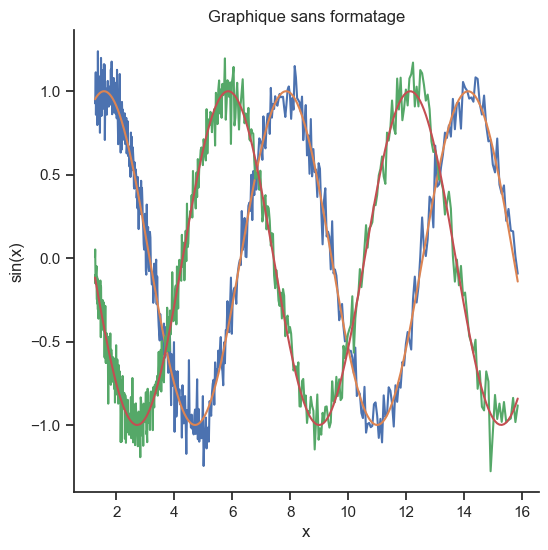

In [5]:
plot_exampleB1(X, Y, Y1ana, Y2, Y2ana)

In [6]:
def plot_exampleB2(X, Y, Y1ana, Y2, Y2ana):
    # Exemple d'une belle figure
    fig = plt.figure(figsize=(6,3))
    plt.title("Graphique avec un formatage adéquat")
    plt.plot(X, Y, ".", color="#FF8715", label="Numerical") # Couleurs avec bon contraste
    plt.plot(X, Y1ana, "-", color="#96500D", label="Analytics")
    plt.plot(X, Y2, ".", color="#08BEF0", label="Numerical")
    plt.plot(X, Y2ana, "-", color="#03495C", label="Analytics")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("sin(x)", fontsize=14)
    # La légende à la main permet ici d'avoir une légende concise
    # Les couleurs seraient expliquées dans le texte
    legend_elements = [Line2D([], [], color='gray', label='Analytics'),
                       Line2D([], [], color='gray', ls="", marker="o", label='Numerical')]
    plt.legend(handles=legend_elements, loc="lower right")
    plt.show()

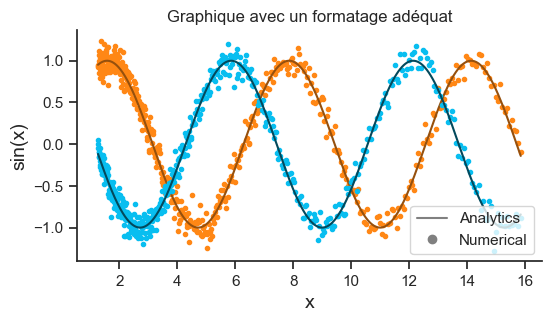

In [7]:
plot_exampleB2(X, Y, Y1ana, Y2, Y2ana)

## Exemple 2
### Tailles des éléments

Il faut toujours choisir l'axe échelles qui favorisent la compréhension du graphique. Faire attention à

- Taille des polices 
- Taille de la figure (i.e., `figsize`)
- Position de la légende 
- Choix des échelles (log vs linear)

In [8]:
# Génération des données
n = 500
X = np.logspace(0.1,1.0,N)
Yexp = X**0.1*np.exp(X) + np.random.poisson(10, N)
Yexp_ana = X**0.1*np.exp(X) 

In [9]:
def plot_exampleC1(X, Yexp, Yexp_ana):
    # Exemple d'une figure dans un mauvais format
    # On ne voit pas les deux courbes
    plt.figure(figsize=(6,6))
    plt.title("Graphique avec mauvais contraste et mauvaise échelle")
    plt.plot(X, Yexp, label="Numerics")
    plt.plot(X, Yexp_ana, label="Analytics")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

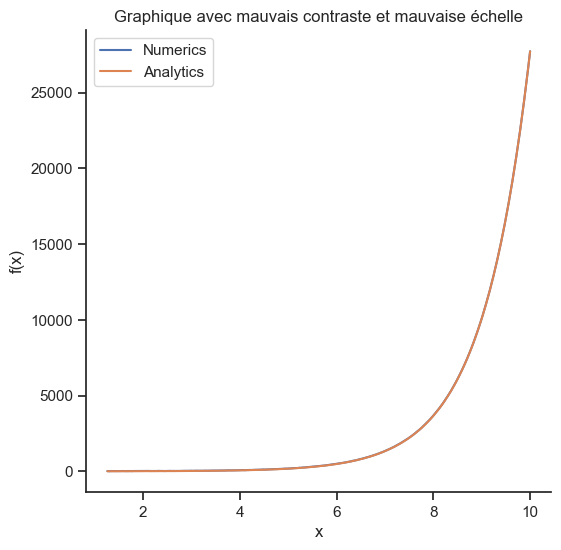

In [10]:
plot_exampleC1(X, Yexp, Yexp_ana)

In [11]:
def plot_exampleC2(X, Yexp, Yexp_ana):
    # Exemple d'une figure avec un meilleur format
    fig = plt.figure(figsize=(4,4))
    plt.title("Graphique avec échelle et contraste adéquats")
    plt.plot(X, Yexp, "-", linewidth=2, color="#FF8715", label="Numerics")
    plt.plot(X, Yexp_ana, '--', linewidth=2, color="#96500D", label="Analytics")
    plt.xlabel("x", fontsize=16)
    plt.ylabel("f(x)", fontsize=16)
    plt.yscale("log")
    ax = plt.gca()
    ax.tick_params(labelsize=16)
    ax.grid(False)
    leg = plt.legend(loc=4, fontsize=16, frameon=False, markerfirst=False)
    # Increase legend linewidth
    for i,legobj in enumerate(leg.legend_handles):
        if i==0:
            legobj.set_linewidth(6.0)
        else:
            legobj.set_linewidth(2.0)

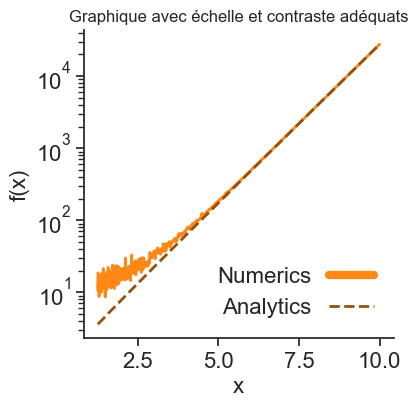

In [12]:
plot_exampleC2(X, Yexp, Yexp_ana)


Dans la dernière figure, remarquez:

- L'inversion de l'ordre label/marker (voir `markerfirst`) dans la légende: peut parfois éviter certaines confusions avec les points réels.
- L'utilisation de l'échelle log.
- La taille de la figure par rapport au contenu.

## 2. Comparaisons

**Chercher la bonne unité de comparaison pour se permettre de conclure.**

Vous aurez souvent à comparer des résultats. Il faut toujours chercher la bonne unité de comparaison. Par exemple, nous avons déjà eu un tableau avec 326 colonnes (chaque colonne représente une valeur de X) et 2 rangées (résultats analytique vs numérique). À la suite du tableau, on peut lire: *On voit que les résultats analytiques sont similaires aux résultats numériques*! Plutôt que ce tableau, il aurait pu faire un graphique de l'écart (Écart vs X),  une moyenne des écarts ou un histogramme des écarts (distribution statistique). 

Pour faire parler un graphique, utilisez des quantités qui importent. Dans l'exemple qui suit, l'erreur absolue en fonction de $x$ apporte peut d'information autre que le fait que l'erreur ne semble pas être corrélée avec $x$. On peut plutôt analyser un histogramme. 

In [13]:
# Génération des données pour une figure
N = 500
X = np.logspace(0.1,1.2,N)
Y = np.sin(X) + np.random.normal(0.0, 0.05, N)
Yana = np.sin(X)
Error1 = Y-Yana

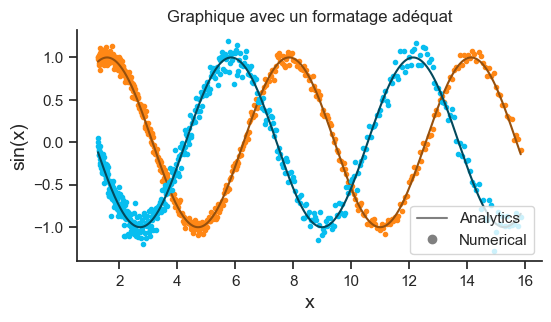

In [14]:
plot_exampleB2(X, Y, Y1ana, Y2, Y2ana)

In [15]:
def plot_exampleD1(X, Y, Yana):
    Error1 = (Y-Yana)
    plt.title("Graphique contenant peu d'information")
    plt.plot(X, Error1, "-")
    plt.xlabel("x", fontsize=16)
    plt.ylabel("Erreur", fontsize=14)
    plt.show()

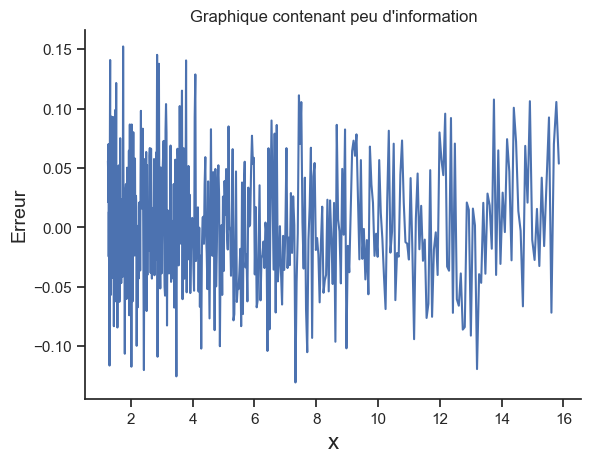

In [16]:
plot_exampleD1(X, Y, Yana)

In [17]:
# Distribution des erreurs
mu = np.mean(Error1)
sigma = np.std(Error1)

# Graphiques
def plot_exampleD3(Error1):
    fig = plt.figure(figsize=(4.5,4)) # On peut mettre le graphique petit pour le combiner avec d'autres graphique dans un pannel
    _ , bins, _ = plt.hist(Error1, bins=50, density=True, color="#FF8715", alpha=0.5)
    norm = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
    plt.title("Graphique illustrant la précision\nde l'estimation numérique")
    plt.plot(bins, norm, color="#96500D", linewidth=2)
    plt.xlabel("Erreur absolue", fontsize=16)
    plt.ylabel("Distribution", fontsize=16)
    ax = plt.gca()
    ax.tick_params(labelsize=16)
    ax.grid(False)

Moyenne:    0.003
Ecart-type: 0.052


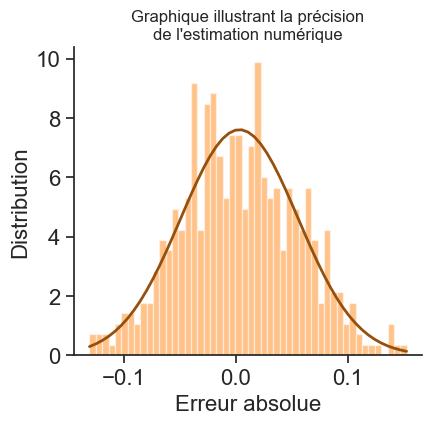

In [18]:
print(f"Moyenne:    {mu:.3f}\nEcart-type: {sigma:.3f}")
plot_exampleD3(Error1)

# Tableaux
## Suggestions

* Préférez toujours les figures aux tableaux, si possible. 
* N'utilisez pas un tableau (mais plutôt une figure) si vous voulez montrer une **tendance** ou une **relation** entre deux séries de données
* Utilisez un tableau pour présenter des informations ponctuelles.
* Utilisez une hiérarchie dans votre présentation (gras, taille de police). 
* Règle générale, un tableau ne devrait jamais avoir plus de 20 colonnes.
* Le titre d'un tableau est placé au-dessus.

## Exemples

<hr>

### Bonne utilisation 

**Tableau 1 : Valeur de $\epsilon_{n}$ en fonction de la précision de l'algorithme. Les chiffres significatifs sont indiqués en gras.**<br>

| Précision | <center>$\epsilon_{n}$          |
|-----------|-------------------------|
| 0.01      | **-0.89**83578125       |
| 0.001     | **-0.89**73814453125    |
| 0.0001    | **-0.896**7101928710938 |
| 0.00001   | **-0.89667**20535278321 |
| 0.000001  | **-0.896671**1000442505 |
| 0.0000001 | **-0.896671**6363787652 |
| 0.00000001| **-0.8966715**842351318 |
    
<br>
<hr>

**Tableau 2 : Propriétés de différents matériaux**<br><br> 

| Matériaux | Masse volumique | Énergie d'excitation |
|---|---|---|
|   | *[g/cm³]*  | *[eV]* |
| Hydrogène | $8.374\times 10^{-5}$ | 19.2 |
| Oxygène | $1.331\times10^{-3}$ | 	95.0 |
   


**Tableau 3a : Comparaison des valeurs moyennes. Les plus grandes valeurs moyennes sont indiquées en gras.**<br><br> 

| Essai | Algorithme A | Algorithme B |Algorithme C | Algorithme D |
|---|---|---|---|---|
| 1 | **0.2314** | 0.2304 |0.2313 |0.2313 |
| 2 | 0.7201 | **0.7304** |0.7301 |0.7302 |

<br>
<hr>

**Tableau 3b : Même graphique que le tableau 3a mais on a transposé la présentation.**<br><br> 


|  | Essai 1 | Essai 2 |
|---|---|---|
| Algorithme A | **0.2314** | 0.7201 |
| Algorithme B | 0.2304 | **0.7304** |
| Algorithme C | 0.2313 | 0.7301 |
| Algorithme D | 0.2313 | 0.7302 |

*Notez comment l'oeil a plus de facilité à comparer les valeurs dans le tableau 3b que 3a.*

<br>
<hr>

### Mauvaise utilisation 
**Tableau 3 : Vitesses de deux projectiles en fonction du temps** <br><br>

| Temps | Vitesse projectile 1 | Vitesse projectile 2 |
|-------|----------------------|----------------------|
|*[s]*    | *[m/s]* | *[m/s]* |
| 0 | 10.0 | 40.0 |
| 1.9 | 9.5 | 35.0 |
| 2.1 | 8.9 | 30.2 |
| 3.2 | 8.3 | 27.8 |
| 4.1 | 8.1 | 23.9 |
| 5.4 | 8.5 | 23.9 |
| 6.4 | 7.1 | 26.4 |
| 7.1 | 5.6 | 23.9 |
| 8.2 | 3.4 | 21.4 |
| 9.7 | 2.4 | 13.9 |

# Fin.

### **Vos correcteurs:** Simon Lizotte & Behnaz Yazdani
### **Bureau:** En arrière de la cafétéria du Vachon (VCH-0058)